# Eeltöötlus jätkub peale name_final ning alias_final ASCII-teisendust  clean_name_ascii() funktsiooniga (Google Colabis)

Faili laadimine: 

[OpenSanctions Datasets Default](https://www.opensanctions.org/datasets/default/)
<br>Targets as simplified CSV
<br>targets.simple.csv
<br>Last processed: 2025-04-07 12:54:33
<br>Last change:	2025-04-07

In [31]:
import pandas as pd

df = pd.read_csv("output02.csv", sep=",", low_memory=False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197741 entries, 0 to 197740
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   197741 non-null  int64 
 1   id_original          197741 non-null  object
 2   name_original        197741 non-null  object
 3   aliases_original     197741 non-null  object
 4   name_clean           197741 non-null  object
 5   alias_clean          197741 non-null  object
 6   name_scripts         197741 non-null  object
 7   alias_scripts        197741 non-null  object
 8   name_script_counts   197741 non-null  object
 9   alias_script_counts  197741 non-null  object
 10  name_script          197741 non-null  object
 11  alias_script         197741 non-null  object
 12  name_final           197741 non-null  object
 13  alias_final          197741 non-null  object
 14  name_tokens          197741 non-null  int64 
 15  alias_tokens         197741 non-nu

# Ümberkirjutus

Kuna ümberkirjutamise funktsioonid on keelepõhised, määrati järgnevalt igale kirjele ka keelekood unikaalsete tähemärkide põhjal: ukraina keele spetsiifilised tähed ґ, є, і, ї ja valgevene keele märk ў. Rakendatud keele määramise meetod oli seega reeglipõhine ja indikatiivne, mitte ammendav ega absoluutne, mistõttu kõigi võimalike ukraina ja valgevene nimede täielik tuvastamine ei olnud tagatud. Tuvastatud keelte esinemissagedused olid järgmised: vene keel – 162 684, ukraina keel – 34 499 ja valgevene keel – 558 kirjet.

In [33]:
UKRAINIAN_CHARS = {'ґ', 'є', 'і', 'ї'}
BELARUSIAN_CHARS = {'ў'}

def detect_lang(text):
    if any(char in text for char in UKRAINIAN_CHARS):
        return 'ua'
    if any(char in text for char in BELARUSIAN_CHARS):
        return 'by'
    return 'ru'

df_ascii_lang=df.copy()

df_ascii_lang['lang'] = df_ascii_lang['alias_final'].apply(detect_lang)

df_ascii_lang.info()
df_ascii_lang.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197741 entries, 0 to 197740
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   197741 non-null  int64 
 1   id_original          197741 non-null  object
 2   name_original        197741 non-null  object
 3   aliases_original     197741 non-null  object
 4   name_clean           197741 non-null  object
 5   alias_clean          197741 non-null  object
 6   name_scripts         197741 non-null  object
 7   alias_scripts        197741 non-null  object
 8   name_script_counts   197741 non-null  object
 9   alias_script_counts  197741 non-null  object
 10  name_script          197741 non-null  object
 11  alias_script         197741 non-null  object
 12  name_final           197741 non-null  object
 13  alias_final          197741 non-null  object
 14  name_tokens          197741 non-null  int64 
 15  alias_tokens         197741 non-nu

,id,id_original,name_original,aliases_original,name_clean,alias_clean,name_scripts,alias_scripts,name_script_counts,alias_script_counts,name_script,alias_script,name_final,alias_final,name_tokens,alias_tokens,name_ascii,alias_ascii,lang
0,10,NK-22KNpaKJL84d8wpFudvLjN,Chanturiia Irakli,CHANTURIA IRAKLI;CHANTURIA IRAKLII;Чантурія Ір...,chanturiia irakli,чантурія іраклі,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 16, 'SPACE': 1})","Counter({'CYRILLIC': 14, 'SPACE': 1})",LATIN,CYRILLIC,chanturiia irakli,чантурія іраклі,2,2,chanturiia irakli,chanturiia irakli,ua
1,13,NK-22c6upVtxbVMhbZb3Z6dn6,Starovoitov Stanislav Yuriiovych,Starovoitov Stanislav;Starovoitov Stas;Старово...,starovoitov stanislav yuriiovych,старовойтов станислав юрьевич,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 30, 'SPACE': 2})","Counter({'CYRILLIC': 27, 'SPACE': 2})",LATIN,CYRILLIC,starovoitov stanislav yuriiovych,старовойтов станислав юрьевич,3,3,starovoitov stanislav yuriiovych,starovoitov stanislav iurevich,ru
2,14,NK-22c6upVtxbVMhbZb3Z6dn6,Starovoitov Stanislav Yuriiovych,Starovoitov Stanislav;Starovoitov Stas;Старово...,starovoitov stanislav yuriiovych,старовойтов станіслав юрійович,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 30, 'SPACE': 2})","Counter({'CYRILLIC': 28, 'SPACE': 2})",LATIN,CYRILLIC,starovoitov stanislav yuriiovych,старовойтов станіслав юрійович,3,3,starovoitov stanislav yuriiovych,starovoitov stanislav iuriiovich,ua
3,15,NK-22c6upVtxbVMhbZb3Z6dn6,Starovoitov Stanislav Yuriiovych,Starovoitov Stanislav;Starovoitov Stas;Старово...,starovoitov stanislav yuriiovych,старовойтов стас,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 30, 'SPACE': 2})","Counter({'CYRILLIC': 15, 'SPACE': 1})",LATIN,CYRILLIC,starovoitov stanislav yuriiovych,старовойтов стас,3,2,starovoitov stanislav yuriiovych,starovoitov stas,ru
4,17,NK-22sRNHw9xqUbicAXF4i7BP,Maslov Alexey Viktorovich,Маслов Алексей Викторович,maslov alexey viktorovich,маслов алексей викторович,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 23, 'SPACE': 2})","Counter({'CYRILLIC': 23, 'SPACE': 2})",LATIN,CYRILLIC,maslov alexey viktorovich,маслов алексей викторович,3,3,maslov alexey viktorovich,maslov aleksei viktorovich,ru


Keelte esinemised veerus 'lang':
ru: 162684
ua: 34499
by: 558


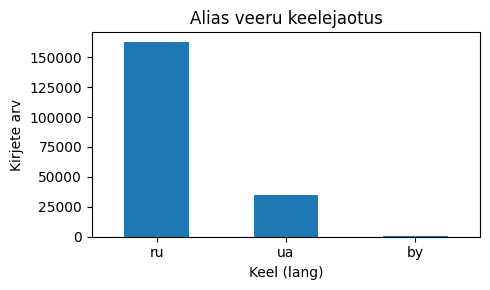

In [34]:
import matplotlib.pyplot as plt

lang_counts = df_ascii_lang['lang'].value_counts()

print("Keelte esinemised veerus 'lang':")
for lang, count in lang_counts.items():
    print(f"{lang}: {count}")

plt.figure(figsize=(5, 3))
lang_counts.plot(kind='bar')

plt.title("Alias veeru keelejaotus")
plt.xlabel("Keel (lang)")
plt.ylabel("Kirjete arv")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
from module_bgn import bgn
from module_dstu_a import dstu_a
from module_dstu_b import dstu_b
from module_eki import eki
from module_gost_b import gost_b
from module_icao import icao
from module_iso9 import iso9
from module_rt_translit import rt_translit

In [36]:
df_ascii_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197741 entries, 0 to 197740
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   197741 non-null  int64 
 1   id_original          197741 non-null  object
 2   name_original        197741 non-null  object
 3   aliases_original     197741 non-null  object
 4   name_clean           197741 non-null  object
 5   alias_clean          197741 non-null  object
 6   name_scripts         197741 non-null  object
 7   alias_scripts        197741 non-null  object
 8   name_script_counts   197741 non-null  object
 9   alias_script_counts  197741 non-null  object
 10  name_script          197741 non-null  object
 11  alias_script         197741 non-null  object
 12  name_final           197741 non-null  object
 13  alias_final          197741 non-null  object
 14  name_tokens          197741 non-null  int64 
 15  alias_tokens         197741 non-nu

Seejärel rakendati ümberkirjutusfunktsioone, kasutades käsitsi koostatud reeglipõhiseid mooduleid skeemi nimest tuletatud lühenditega: bgn, icao, gost_b, eki, rt_translit, iso9, dstu_b ja dstu_a

In [37]:
df_translit = df_ascii_lang.copy()

df_translit["iso9"]         = df_translit["alias_final"].apply(iso9)
df_translit["dstu_a"]       = df_translit["alias_final"].apply(dstu_a)
df_translit["icao"]         = df_translit["alias_final"].apply(icao)
df_translit["dstu_b"]       = df_translit["alias_final"].apply(dstu_b)

df_translit["gost_b"]       = df_translit.apply(lambda row: gost_b(row["alias_final"], row["lang"]), axis=1)
df_translit["bgn"]          = df_translit.apply(lambda row: bgn(row["alias_final"], row["lang"]), axis=1)
df_translit["rt_translit"]  = df_translit.apply(lambda row: rt_translit(row["alias_final"], row["lang"]), axis=1)
df_translit["eki"]          = df_translit.apply(lambda row: eki(row["alias_final"], row["lang"]), axis=1)

In [38]:
df_translit.sample(5)

,id,id_original,name_original,aliases_original,name_clean,alias_clean,name_scripts,alias_scripts,name_script_counts,alias_script_counts,...,alias_ascii,lang,iso9,dstu_a,icao,dstu_b,gost_b,bgn,rt_translit,eki
67569,337632,Q17099015,Bjørn Christian Kahrs,Bjorn Christian Kahrs;Бьорн Кристиан Карс,bjørn christian kahrs,бьорн кристиан карс,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 19, 'SPACE': 2})","Counter({'CYRILLIC': 17, 'SPACE': 2})",...,born kristian kars,ru,bʹorn kristian kars,bjorn krystyan kars,born kristian kars,bjorn krystyan kars,b'orn kristian kars,b'orn kristian kars,b’orn kristian kars,b’orn kristian kars
36294,181156,Q11692807,Daniel Valchev,DANIEL VASILEV VALCHEV;Daniel Valtchev;Daniel ...,daniel valchev,даниел василев вълчев,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 13, 'SPACE': 1})","Counter({'CYRILLIC': 19, 'SPACE': 2})",...,daniel vasilev vlchev,ru,daniel vasilev vʺlčev,danyel vasylev vǒlčev,daniel vasilev vielchev,danyel vasylev vohlchev,daniel vasilev v''lchev,"daniyel vasilev v""lchev",daniel vasilev v”lčev,daniel vasilev v”lčev
157419,860113,Q6781644,Maryna Hrymych,Maryna Hrymytsch;Maryna Hrymyč;Maryna Williwna...,maryna hrymych,гримич марина віллівна,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 13, 'SPACE': 1})","Counter({'CYRILLIC': 20, 'SPACE': 2})",...,grimich marina villivna,ua,grimič marina vìllìvna,ğrymyč maryna villivna,grimich marina villivna,ghrymych maryna villivna,gry′my′ch mary′na villivna,hrymych maryna villivna,grõmõtš marõna villivna,hrymych maryna villivna
158120,866523,Q691471,Dmytro Pavlychko,Dmitri Pavlõtško;Dmitro Vasziljovics Pavlicsko...,dmytro pavlychko,дмитрий васильевич павлычко,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 15, 'SPACE': 1})","Counter({'CYRILLIC': 25, 'SPACE': 2})",...,dmitrii vasilevich pavlychko,ru,dmitrij vasilʹevič pavlyčko,dmytryj vasylj’evyč pavlɏčko,dmitrii vasilevich pavlychko,dmytryj vasylj'evych pavlywchko,dmitrij vasil'evich pavly′chko,dmitriy vasil'yevich pavlychko,dmitrij vasil’evič pavlyčko,dmitrij vasil’evič pavlyčko
128008,637417,Q44430,Vince McMahon,McMahon;Mr McMahon;Mr Vince McMahon;Mr. McMaho...,vince mcmahon,вінсент кеннеді макмен,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 12, 'SPACE': 1})","Counter({'CYRILLIC': 20, 'SPACE': 2})",...,vinsent kennedi makmen,ua,vìnsent kennedì makmen,vinsent kennedi makmen,vinsent kennedi makmen,vinsent kennedi makmen,vinsent kennedi makmen,vinsent kennedi makmen,vinsent kennedi makmen,vinsent kennedi makmen


In [39]:
df_translit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197741 entries, 0 to 197740
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   197741 non-null  int64 
 1   id_original          197741 non-null  object
 2   name_original        197741 non-null  object
 3   aliases_original     197741 non-null  object
 4   name_clean           197741 non-null  object
 5   alias_clean          197741 non-null  object
 6   name_scripts         197741 non-null  object
 7   alias_scripts        197741 non-null  object
 8   name_script_counts   197741 non-null  object
 9   alias_script_counts  197741 non-null  object
 10  name_script          197741 non-null  object
 11  alias_script         197741 non-null  object
 12  name_final           197741 non-null  object
 13  alias_final          197741 non-null  object
 14  name_tokens          197741 non-null  int64 
 15  alias_tokens         197741 non-nu

Võrdlus väljaga name näitas, et täielik kattuvus esines enim skeemides BGN/PCGN (24 597 vastet), OpenSanctionsi CLDR/ICU (23 478) ja ICAO (23 385), samas kui DSTU A puhul vaid 2 467 vastet, mis märgib u kümme korda nõrgemat tulemust kui parimate skeemide puhul.

In [40]:
translit_columns = [
    "iso9", "dstu_a", "icao", "dstu_b", "alias_ascii", 
    "gost_b", "bgn", "rt_translit", "eki"
]

match_counts = {}

for col in translit_columns:
    match = (df_translit[col] == df_translit["name_final"])
    match_counts[col] = match.sum()

df_match_counts = pd.DataFrame.from_dict(match_counts, orient='index', columns=["match_count"]).sort_values(by="match_count", ascending=False)
print(df_match_counts)

             match_count
bgn                24597
alias_ascii        23478
icao               23385
gost_b             17098
eki                14990
rt_translit         9809
iso9                8765
dstu_b              3945
dstu_a              2467


In [41]:
# Kontroll: kas vähemalt üks veergudest on võrdne alias_final väärtusega
any_match = df_translit[translit_columns].eq(df_translit["name_final"], axis=0).any(axis=1)

# Loendame
match_count = any_match.sum()
total_count = len(df_translit)
percentage = match_count / total_count * 100

print(f"Ridu, kus vähemalt üks translitereeritud väärtus võrdub name_final-iga: {match_count}")
print(f"See moodustab {percentage:.2f}% kõigist ridadest ({total_count} rida).")

Ridu, kus vähemalt üks translitereeritud väärtus võrdub name_final-iga: 35710
See moodustab 18.06% kõigist ridadest (197741 rida).


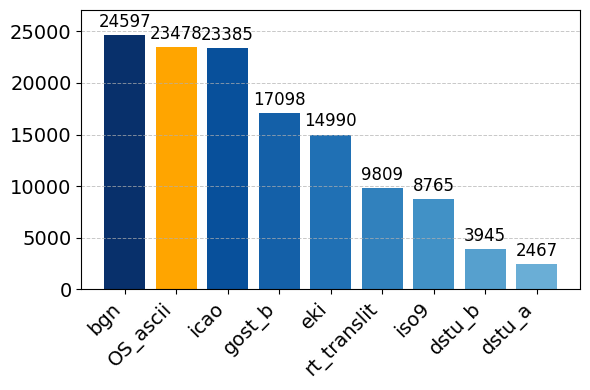

In [42]:
import numpy as np

heights = df_match_counts["match_count"]
labels = df_match_counts.index.tolist()

label_mapping = {"alias_ascii": "OS_ascii"}
labels = [label_mapping.get(label, label) for label in labels]

colors = plt.cm.Blues(np.linspace(1, 0.5, len(heights)))

highlight_color = 'orange'
colors = list(colors)

for idx, label in enumerate(labels):
    if label == "OS_ascii":
        colors[idx] = highlight_color

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, heights, color=colors)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, heights.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

plt.tight_layout()

plt.show()

Kokku esines 35 210 rida, kus vähemalt üks ümberkirjutatud väärtus oli võrdne name väärtusega, mis moodustab kogu andmestikust 18,1%. Kuna OpenSanctionsi kasutatav CLDR/ICU skeem teisendas 23 478 alias väärtust selliselt, et need kattusid väljaga name, siis kõigist ümberkirjutamisega tuletatud nimevariantidest vastab täpselt eesmärgipärasele kujule väike osa ehk 11,9% kogu andmestikust.

In [43]:
any_match = df_translit[translit_columns].eq(df_translit["name_final"], axis=0).any(axis=1)

match_count = any_match.sum()
total_count = len(df_translit)
percentage = match_count / total_count * 100

print(f"Ridu, kus vähemalt üks ümber kirjutatud väärtus võrdub name_final-iga: {match_count}")
print(f"See moodustab {percentage:.2f}% kõigist ridadest ({total_count} rida).")

Ridu, kus vähemalt üks ümber kirjutatud väärtus võrdub name_final-iga: 35710
See moodustab 18.06% kõigist ridadest (197741 rida).


Ümberkirjutamissüsteemide hindamiseks vaadeldi ka tühjade väärtuste esinemist keelte kaupa. OpenSanctions kasutab CLDR/ICU Transliterator rakendamise ebaõnnestumisel text_unidecode funktsiooni, mis üritab iga Unicode'i märgi vastendada ASCII tekstiks. Nii ei ole OS-ascii skeemis ühtegi ebaõnnestunud ümberkirjutust. Teiste skeemide hulgas osutus kõige stabiilsemaks ja universaalsemaks ISO 9, mis pakkus suhteliselt head katvust kõigis kolmes keeles (vene, valgvene, ukraina). Eesti siseriiklikule ümberkirjutamisreeglitele põhinev skeem (VV määruse nr 61 tähemärgitabelid, rt_translit) näitas kehvemat katvust ukraina keele puhul, kuid oli eriti tõhus valgevene nimede puhul (vaid 14 tühja väärtust).

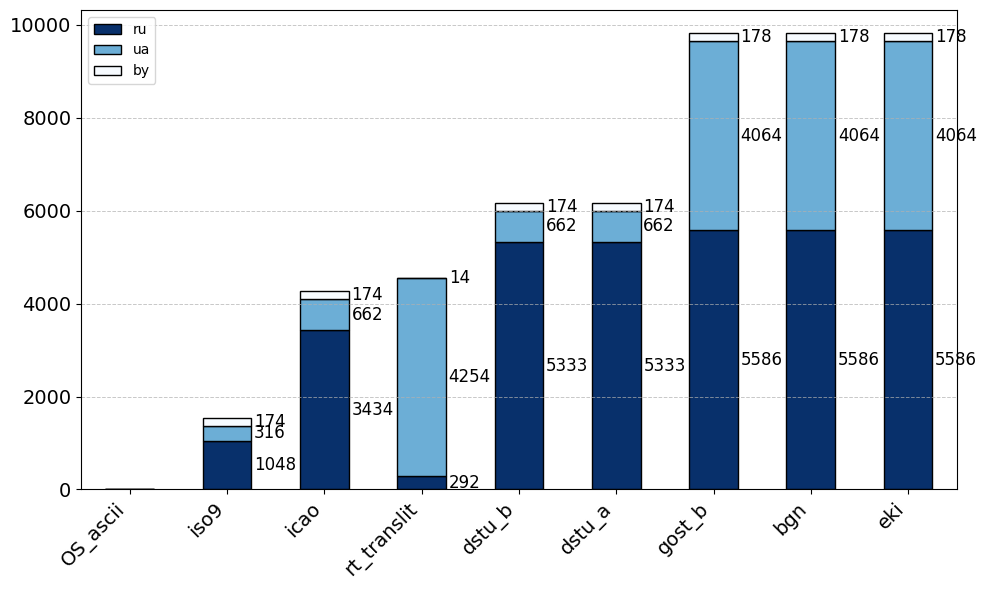

In [44]:
nulls_by_lang = df_translit.groupby("lang")[translit_columns].apply(lambda group: group.isnull().sum())
nulls_by_scheme = nulls_by_lang.transpose()

scheme_totals = nulls_by_scheme.sum(axis=0)
sorted_schemes = scheme_totals.sort_values(ascending=False).index
nulls_by_scheme = nulls_by_scheme[sorted_schemes]

lang_totals = nulls_by_scheme.sum(axis=1)
sorted_langs = lang_totals.sort_values(ascending=True).index
nulls_by_scheme = nulls_by_scheme.loc[sorted_langs]

ax = nulls_by_scheme.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Blues_r',
    edgecolor='black',
    linewidth=1
)

label_mapping = {"alias_ascii": "OS_ascii"}

new_labels = [label_mapping.get(label.get_text(), label.get_text()) for label in ax.get_legend().get_texts()]
for text, new_text in zip(ax.get_legend().get_texts(), new_labels):
    text.set_text(new_text)

new_xticklabels = [label_mapping.get(t.get_text(), t.get_text()) for t in ax.get_xticklabels()]
ax.set_xticklabels(new_xticklabels, rotation=45, ha='right', fontsize=14)

plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

ax.legend(title=None)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(
                f'{int(height)}',
                xy=(bar.get_x() + bar.get_width(), bar.get_y() + height / 2),
                xytext=(2, 0),
                textcoords="offset points",
                ha='left', va='center',
                fontsize=12, color='black'
            )

plt.tight_layout()
plt.show()

Ridu, mille puhul kõik kaheksa skeemi suutsid nimekuju edukalt ümber kirjutada, oli kokku 187 122, millest 156 814 olid vene, 29 933 ukraina ja 375 valgevene nimed.

In [45]:
df_complete_translit = df_translit[df_translit[translit_columns].notnull().all(axis=1)].copy()

print(f"Ridu, kus kõik ümberkirjutuse väärtused on olemas: {len(df_complete_translit)}")

Ridu, kus kõik ümberkirjutuse väärtused on olemas: 187122


In [46]:
any_match = df_complete_translit[translit_columns].eq(df_complete_translit["name_final"], axis=0).any(axis=1)

match_count = any_match.sum()
total_count = len(df_complete_translit)
percentage = match_count / total_count * 100

print(f"Ridu, kus vähemalt üks ümber kirjutatud väärtus võrdub name_final-iga: {match_count}")
print(f"See moodustab {percentage:.2f}% kõigist ridadest ({total_count} rida).")

Ridu, kus vähemalt üks ümber kirjutatud väärtus võrdub name_final-iga: 34864
See moodustab 18.63% kõigist ridadest (187122 rida).


In [47]:
df_complete_translit.sample(5)

,id,id_original,name_original,aliases_original,name_clean,alias_clean,name_scripts,alias_scripts,name_script_counts,alias_script_counts,...,alias_ascii,lang,iso9,dstu_a,icao,dstu_b,gost_b,bgn,rt_translit,eki
7856,31948,NK-KJYbsEJMqrQBbpBXKdMGt2,Bekker Oleh Yukhymovych,Bekker Oleg;Беккер Олег Ефимович;Беккер Олег Ю...,bekker oleh yukhymovych,беккер олег юхимович,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 21, 'SPACE': 2})","Counter({'CYRILLIC': 18, 'SPACE': 2})",...,bekker oleg iukhimovich,ru,bekker oleg ûhimovič,bekker oleğ juxymovyč,bekker oleg iukhimovich,bekker olegh jukhymovych,bekker oleg yuximovich,bekker oleg yukhimovich,bekker oleg juhimovič,bekker oleg juhimovič
44795,208466,Q120855077,CHesnokov Aleksandr,Чесноков Александр;Чесноков Олександр,chesnokov aleksandr,чесноков александр,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 18, 'SPACE': 1})","Counter({'CYRILLIC': 17, 'SPACE': 1})",...,chesnokov aleksandr,ru,česnokov aleksandr,česnokov aleksandr,chesnokov aleksandr,chesnokov aleksandr,chesnokov aleksandr,chesnokov aleksandr,česnokov aleksandr,česnokov aleksandr
161852,893284,Q736840,Konstantin Iosifovich Kosachev,KONSTANTIN KOSACHEV;KOSACHEV KONSTANTIN;KOSACH...,konstantin iosifovich kosachev,константин иосифович косачев,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 28, 'SPACE': 2})","Counter({'CYRILLIC': 26, 'SPACE': 2})",...,konstantin iosifovich kosachev,ru,konstantin iosifovič kosačev,konstantyn yosyfovyč kosačev,konstantin iosifovich kosachev,konstantyn yosyfovych kosachev,konstantin iosifovich kosachev,konstantin iosifovich kosachev,konstantin iosifovič kosačev,konstantin iosifovič kosačev
138077,691274,Q50345548,Anwar ul Haq Kakar,Anvarul Hak Kakar;Anwaar ul Haq Kakar;Anwar ul...,anwar ul haq kakar,"какар, анвар-уль-хак","{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC', 'COMMA', 'HYPHEN-MINUS'}","Counter({'LATIN': 15, 'SPACE': 3})","Counter({'CYRILLIC': 16, 'HYPHEN-MINUS': 2, 'C...",...,kakar anvar ul khak,ru,"kakar, anvar-ulʹ-hak","kakar, anvar-ulj-xak","kakar, anvar-ul-khak","kakar, anvar-ulj-khak","kakar, anvar-ul'-xak","kakar, anvar-ul'-khak","kakar, anvar-ul’-hak","kakar, anvar-ul’-hak"
86429,447179,Q2460954,Giorgio La Malfa,"Ла Мальфа, Джорджо;جيورجيو لا مالفا;조르조 라 말파;조...",giorgio la malfa,"ла мальфа, джорджо","{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC', 'COMMA'}","Counter({'LATIN': 14, 'SPACE': 2})","Counter({'CYRILLIC': 15, 'SPACE': 2, 'COMMA': 1})",...,la malfa dzhordzho,ru,"la malʹfa, džordžo","la maljfa, džordžo","la malfa, dzhordzho","la maljfa, dzhordzho","la mal'fa, dzhordzho","la mal'fa, dzhordzho","la mal’fa, džordžo","la mal’fa, džordžo"


Keelte esinemised veerus 'lang':
ru: 156814
ua: 29933
by: 375


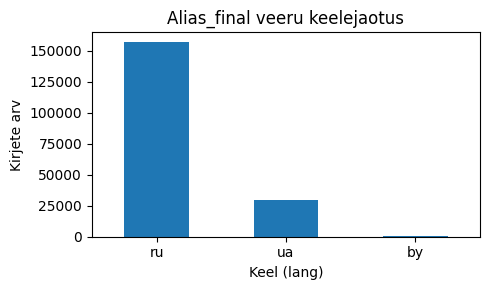

In [48]:
lang_counts = df_complete_translit['lang'].value_counts()

print("Keelte esinemised veerus 'lang':")
for lang, count in lang_counts.items():
    print(f"{lang}: {count}")

plt.figure(figsize=(5, 3))
lang_counts.plot(kind='bar')

plt.title("Alias_final veeru keelejaotus")
plt.xlabel("Keel (lang)")
plt.ylabel("Kirjete arv")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
df_complete_translit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187122 entries, 0 to 197740
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   187122 non-null  int64 
 1   id_original          187122 non-null  object
 2   name_original        187122 non-null  object
 3   aliases_original     187122 non-null  object
 4   name_clean           187122 non-null  object
 5   alias_clean          187122 non-null  object
 6   name_scripts         187122 non-null  object
 7   alias_scripts        187122 non-null  object
 8   name_script_counts   187122 non-null  object
 9   alias_script_counts  187122 non-null  object
 10  name_script          187122 non-null  object
 11  alias_script         187122 non-null  object
 12  name_final           187122 non-null  object
 13  alias_final          187122 non-null  object
 14  name_tokens          187122 non-null  int64 
 15  alias_tokens         187122 non-null  i

# ASCII-teisendus
Lisaks teisendati iga ümberkirjutussüsteemi väljundi alusel veel juurde ASCII-vorming, kasutades selleks Pythoni Unidecode teeki. Vastavad veerud märgistati kujul {skeemi_lühend}_ascii.

In [50]:
!pip install unidecode

In [51]:
from unidecode import unidecode

columns_to_ascii = ['iso9', 'dstu_a', 'icao', 'dstu_b', 'gost_b', 'bgn', 'rt_translit', 'eki']

for col in columns_to_ascii:
    ascii_col = f'{col}_ascii'
    df_complete_translit[ascii_col] = df_complete_translit[col].apply(unidecode)

In [52]:
ascii_cols_null = [f'{col}_ascii' for col in ['iso9', 'dstu_a', 'icao', 'dstu_b', 'gost_b', 'bgn', 'rt_translit', 'eki']]

df_complete_translit[ascii_cols_null].isna().any(axis=1).sum()

np.int64(0)

In [53]:
from collections import Counter

def count_characters(series):
    counter = Counter()
    for text in series.dropna().astype(str):
        counter.update(text)
    return counter

char_counts_per_col = {col: count_characters(df_complete_translit[col]) for col in ascii_cols_null}

total_char_counts = Counter()
for counter in char_counts_per_col.values():
    total_char_counts.update(counter)

for char, count in total_char_counts.most_common(30):
    print(f"'{char}': {count} korda (U+{ord(char):04X})")

'a': 3355040 korda (U+0061)
'i': 2258254 korda (U+0069)
' ': 2213808 korda (U+0020)
'o': 2097258 korda (U+006F)
'e': 2011626 korda (U+0065)
'n': 1817072 korda (U+006E)
'v': 1761416 korda (U+0076)
'r': 1710496 korda (U+0072)
'l': 1450992 korda (U+006C)
's': 1309574 korda (U+0073)
'k': 1247448 korda (U+006B)
'd': 951200 korda (U+0064)
'y': 938614 korda (U+0079)
't': 870493 korda (U+0074)
'm': 858592 korda (U+006D)
'h': 853335 korda (U+0068)
'c': 720673 korda (U+0063)
'u': 623840 korda (U+0075)
'j': 614087 korda (U+006A)
'g': 540348 korda (U+0067)
'b': 392848 korda (U+0062)
'z': 392368 korda (U+007A)
''': 267754 korda (U+0027)
'p': 257352 korda (U+0070)
',': 242936 korda (U+002C)
'f': 146600 korda (U+0066)
'x': 69310 korda (U+0078)
'-': 34584 korda (U+002D)
'.': 26920 korda (U+002E)
'w': 11051 korda (U+0077)


In [54]:
df_complete_translit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187122 entries, 0 to 197740
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   187122 non-null  int64 
 1   id_original          187122 non-null  object
 2   name_original        187122 non-null  object
 3   aliases_original     187122 non-null  object
 4   name_clean           187122 non-null  object
 5   alias_clean          187122 non-null  object
 6   name_scripts         187122 non-null  object
 7   alias_scripts        187122 non-null  object
 8   name_script_counts   187122 non-null  object
 9   alias_script_counts  187122 non-null  object
 10  name_script          187122 non-null  object
 11  alias_script         187122 non-null  object
 12  name_final           187122 non-null  object
 13  alias_final          187122 non-null  object
 14  name_tokens          187122 non-null  int64 
 15  alias_tokens         187122 non-null  i

Mitte-ASCII tähemärke sisaldavate ridade osakaalu jaotus ümberkirjutussüsteemide kaupa, koos võrdlusega algse name veeru mitte-ASCII tähemärkide osakaaluga

In [55]:
def contains_non_ascii(s):
    return any(ord(c) > 127 for c in s)

df_nonascii = df_complete_translit.copy()

df_nonascii["has_non_ascii"] = df_nonascii["name_final"].apply(contains_non_ascii)

non_ascii_ratio = df_nonascii["has_non_ascii"].mean() * 100

print(f"Veerus 'name_final'  mitte-ASCII tähti {non_ascii_ratio:.2f}% ridadest.")

Veerus 'name_final'  mitte-ASCII tähti 5.55% ridadest.


In [56]:
alias_cols = ["name_final", "iso9", "dstu_a", "icao", "dstu_b", "gost_b", "bgn", "rt_translit", "eki", "alias_ascii"]

def contains_non_ascii(s):
    return any(ord(c) > 127 for c in s) if isinstance(s, str) else False

ascii_stats = {}

for col in alias_cols:
    non_ascii_count = df_nonascii[col].apply(contains_non_ascii).mean()
    ascii_stats[col] = round(non_ascii_count * 100, 2)

ascii_df = pd.DataFrame.from_dict(ascii_stats, orient="index", columns=["% mitte-ASCII"]).sort_values("% mitte-ASCII", ascending=False)

print("\nMitte-ASCII tähti sisaldavate ridade osakaal skeemide lõikes:")
print(ascii_df.to_string())


Mitte-ASCII tähti sisaldavate ridade osakaal skeemide lõikes:
             % mitte-ASCII
iso9                 77.81
dstu_a               72.83
rt_translit          67.15
eki                  55.86
gost_b               19.76
dstu_b                7.25
name_final            5.55
bgn                   2.24
icao                  0.00
alias_ascii           0.00


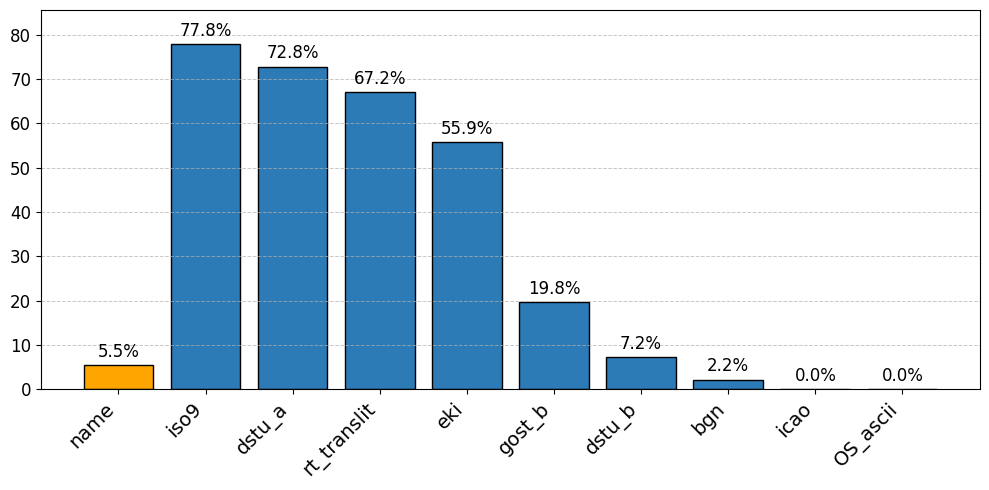

In [57]:
name_value = ascii_df.loc["name_final", "% mitte-ASCII"]

other_values = ascii_df.drop("name_final").sort_values("% mitte-ASCII", ascending=False)

ascii_ordered = pd.concat([
    pd.DataFrame({"% mitte-ASCII": [name_value]}, index=["name"]),
    other_values
])

label_mapping = {"alias_ascii": "OS_ascii"}
x_labels = [label_mapping.get(label, label) for label in ascii_ordered.index]

highlight_color = '#FFA500'  # kollakas-oranž
default_color = '#2c7bb6'    # sinine

colors = []
for label in ascii_ordered.index:
    if label in ["name", "alias_ascii"]:
        colors.append(highlight_color)
    else:
        colors.append(default_color)

fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(x_labels, ascii_ordered["% mitte-ASCII"], color=colors, edgecolor='black', linewidth=1)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=12)
ax.set_ylim(0, ascii_ordered["% mitte-ASCII"].max() * 1.1)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

# Testandmestiku loomine

Vastendamise täpsuse hindamiseks vajaliku klassifitseerimisülesande võimaldamiseks lisati algandmestikku binaarne märgendiveerg, mille väärtuseks määrati kõikidele olemasolevatele kirjetüüpidele True. Seejärel genereeriti negatiivsed ehk valed nimepaarid, säilitades name välja algsel kujul, kuid asendades ümberkirjutusskeemide väljundid juhuslikult valitud teiste ridade vastavate väärtustega (sünteetiliste negatiivsete näidete loomine läbi juhusliku segamise). Selliselt moodustatud vale-paaride väärtuseks määrati False. Tulemuseks saadud andmestikus on kokku 374 244 rida.

In [58]:
df = df_complete_translit.copy()
translit_cols = ["aliases_original", "alias_clean", "alias_final", "alias_ascii", "lang",
                 "iso9", "dstu_a", "icao", "dstu_b", "gost_b", "bgn", "rt_translit", "eki", 
                 "iso9_ascii", "dstu_a_ascii", "icao_ascii", "dstu_b_ascii", "gost_b_ascii", "bgn_ascii", "rt_translit_ascii", "eki_ascii"]

df["label"] = True
df_true = df.copy()

def false_pairs(df: pd.DataFrame, translit_cols: list[str], n_samples: int = None):
    if n_samples is None:
        n_samples = len(df)

    np.random.seed(42)

    df_left = df.sample(n=n_samples, replace=True).reset_index(drop=True)

    df_right_translit = df[translit_cols].sample(n=n_samples, replace=True).reset_index(drop=True)

    df_false = df_left.copy()
    for col in translit_cols:
        df_false[col] = df_right_translit[col]

    df_false["label"] = False
    return df_false

df_false = false_pairs(df_true, translit_cols)

df_pairs = pd.concat([df_true, df_false], ignore_index=True)
df_pairs = df_pairs.sample(frac=1.0, random_state=42).reset_index(drop=True)  # sega read

print(df_pairs["label"].value_counts())

label
False    187122
True     187122
Name: count, dtype: int64


In [59]:
df_pairs.sample(10)

,id,id_original,name_original,aliases_original,name_clean,alias_clean,name_scripts,alias_scripts,name_script_counts,alias_script_counts,...,eki,iso9_ascii,dstu_a_ascii,icao_ascii,dstu_b_ascii,gost_b_ascii,bgn_ascii,rt_translit_ascii,eki_ascii,label
18268,640532,Q4465680,Haji Akbar Turajanzade,Akbar Turajonzoda;Hoji Akbar To‘rajonzoda;Тура...,haji akbar turajanzade,ходжи акбар тураджонзода,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 20, 'SPACE': 2})","Counter({'CYRILLIC': 22, 'SPACE': 2})",...,hodži akbar turadžonzoda,hodzi akbar turadzonzoda,xodzy akbar turadzonzoda,khodzhi akbar turadzhonzoda,khodzhy akbar turadzhonzoda,xodzhi akbar turadzhonzoda,khodzhi akbar turadzhonzoda,hodzi akbar turadzonzoda,hodzi akbar turadzonzoda,True
59152,254568,Q133303745,Nikolaev Anatoly Nikolaevich,Майя Майсурадзе;مايا مايسورادزي;მაია მაისურაძე,nikolaev anatoly nikolaevich,майя майсурадзе,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 26, 'SPACE': 2})","Counter({'CYRILLIC': 27, 'SPACE': 2})",...,majja majsuradze,maja majsuradze,majja majsuradze,maiia maisuradze,majja majsuradze,majya majsuradze,mayya maysuradze,majja majsuradze,majja majsuradze,False
87045,588710,Q4083536,Alexander Belyakov,Kondrashov Valentin;ВАЛЕНТИН МИХАЙЛОВИЧ КОНДРА...,alexander belyakov,кондрашов валентин михайлович,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 17, 'SPACE': 1})","Counter({'CYRILLIC': 16, 'SPACE': 1})",...,kondrašov valentin mihajlovič,kondrasov valentin mihajlovic,kondrasov valentyn myxajlovyc,kondrashov valentin mikhailovich,kondrashov valentyn mykhajlovych,kondrashov valentin mixajlovich,kondrashov valentin mikhaylovich,kondrasov valentin mihajlovic,kondrasov valentin mihajlovic,False
167185,173396,Q116055950,Yordan Kostadinov,Jordan Andonow;Jordan Georgiew Andonow;YORDAN ...,yordan kostadinov,йордан георгиев андонов,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 16, 'SPACE': 1})","Counter({'CYRILLIC': 24, 'SPACE': 2})",...,jordan georgiev andonov,jordan georgiev andonov,jordan georgyev andonov,iordan georgiev andonov,jordan gheorghyev andonov,jordan georgiev andonov,yordan georgiyev andonov,jordan georgiev andonov,jordan georgiev andonov,False
180250,594272,Q4130096,Oleg Vyugin,Oleg V'jugin;Oleg Vjatsjeslavovitsj Vjugin;Ole...,oleg vyugin,вьюгин о. в.,"{'SPACE', 'LATIN'}","{'SPACE', 'FULL', 'CYRILLIC'}","Counter({'LATIN': 10, 'SPACE': 1})","Counter({'CYRILLIC': 8, 'SPACE': 2, 'FULL': 2})",...,v’jugin o. v,v'ugin o. v,vjjugyn o. v,viugin o. v,vjjughyn o. v,v'yugin o. v,v'yugin o. v,v'jugin o. v,v'jugin o. v,True
293672,564688,Q3633026,Arun Gawli,"Arun Gulab Gawli;Арун Гавли;Гавли, Арун;अरुण गवली",arun gawli,арун гавли,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 9, 'SPACE': 1})","Counter({'CYRILLIC': 9, 'SPACE': 1})",...,arun gavli,arun gavli,arun gavly,arun gavli,arun ghavly,arun gavli,arun gavli,arun gavli,arun gavli,True
355788,727801,Q55208,Andrei Koncealovski,Andrei Konchalovski;Andrei Konchalovsky;Andrei...,andrei koncealovski,андрон кончаловский,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 18, 'SPACE': 1})","Counter({'CYRILLIC': 18, 'SPACE': 1})",...,andron končalovskij,andron koncalovskij,andron koncalovskyj,andron konchalovskii,andron konchalovskyj,andron konchalovskij,andron konchalovskiy,andron koncalovskij,andron koncalovskij,True
281588,64116,NK-aS5xrZWeLzF5d6sHjZbWhy,Krymova Tetiana Mykolayivna,Naumets Sergei;Naumets Sergei Sergeevich;Naume...,krymova tetiana mykolayivna,наумец сергей сергеевич,"{'SPACE', 'LATIN'}","{'SPACE', 'CYRILLIC'}","Counter({'LATIN': 25, 'SPACE': 2})","Counter({'CYRILLIC': 24, 'SPACE': 2})",...,naumec sergej sergeevič,naumec sergej sergeevic,naumec sergej sergeevyc,naumets sergei sergeevich,naumec serghej sergheevych,naumecz sergej sergeevich,naumets sergey sergeyevich,naumec sergej sergeevic,naumec sergej sergeevic,False
201653,159813,Q113377029,Yury Ramanouski,"Романовский, Юрий Яцентович;Романовський Юрій 

In [60]:
df_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374244 entries, 0 to 374243
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   374244 non-null  int64 
 1   id_original          374244 non-null  object
 2   name_original        374244 non-null  object
 3   aliases_original     374244 non-null  object
 4   name_clean           374244 non-null  object
 5   alias_clean          374244 non-null  object
 6   name_scripts         374244 non-null  object
 7   alias_scripts        374244 non-null  object
 8   name_script_counts   374244 non-null  object
 9   alias_script_counts  374244 non-null  object
 10  name_script          374244 non-null  object
 11  alias_script         374244 non-null  object
 12  name_final           374244 non-null  object
 13  alias_final          374244 non-null  object
 14  name_tokens          374244 non-null  int64 
 15  alias_tokens         374244 non-nu

# Eksport CSV faili

In [61]:
df_pairs.to_csv("df_pairs_final.csv", index=False, encoding="utf-8", sep=";")

# Konverteerimine HTML failiks 

In [ ]:
!jupyter nbconvert --to html eeltootlus03.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'eeltootlus.ipynb' matched no files
